     Powell: time 0.21s
       BFGS: time 0.52s, x error 0.02, f error -0.02
     L-BFGS: time 0.04s, x error 0.02, f error -0.02
  BFGS w f': time 0.06s, x error 0.02, f error -0.02
L-BFGS w f': time 0.00s, x error 0.02, f error -0.02
     Newton: time 0.01s, x error 0.02, f error -0.02


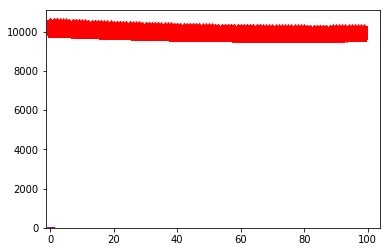

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
import time
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(0)

K = np.random.normal(size=(100, 100))

def f(x):
    return np.sum((np.dot(K, x - 1))**2) + np.sum(x**2)**2


def f_prime(x):
    return 2*np.dot(np.dot(K.T, K), x - 1) + 4*np.sum(x**2)*x


def hessian(x):
    H = 2*np.dot(K.T, K) + 4*2*x*x[:, np.newaxis]
    return H + 4*np.eye(H.shape[0])*np.sum(x**2)


Z = X, Y = np.mgrid[-1.5:1.5:100j, -1.1:1.1:100j]
# Complete in the additional dimensions with zeros
Z = np.reshape(Z, (2, -1)).copy()
Z.resize((100, Z.shape[-1]))
Z = np.apply_along_axis(f, 0, Z)
Z = np.reshape(Z, X.shape)
plt.plot(Z.T, 'r*')
plt.contour(X, Y, Z, cmap=cm.gnuplot)

# A reference but slow solution:
t0 = time.time()
x_ref = optimize.minimize(f, K[0], method="Powell").x
print('     Powell: time %.2fs' % (time.time() - t0))
f_ref = f(x_ref)

# Compare different approaches
t0 = time.time()
x_bfgs = optimize.minimize(f, K[0], method="BFGS").x
print('       BFGS: time %.2fs, x error %.2f, f error %.2f' % (time.time() - t0,
    np.sqrt(np.sum((x_bfgs - x_ref)**2)), f(x_bfgs) - f_ref))

t0 = time.time()
x_l_bfgs = optimize.minimize(f, K[0], method="L-BFGS-B").x
print('     L-BFGS: time %.2fs, x error %.2f, f error %.2f' % (time.time() - t0,
    np.sqrt(np.sum((x_l_bfgs - x_ref)**2)), f(x_l_bfgs) - f_ref))


t0 = time.time()
x_bfgs = optimize.minimize(f, K[0], jac=f_prime, method="BFGS").x
print("  BFGS w f': time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_bfgs - x_ref)**2)),
    f(x_bfgs) - f_ref))

t0 = time.time()
x_l_bfgs = optimize.minimize(f, K[0], jac=f_prime, method="L-BFGS-B").x
print("L-BFGS w f': time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_l_bfgs - x_ref)**2)),
    f(x_l_bfgs) - f_ref))

t0 = time.time()
x_newton = optimize.minimize(f, K[0], jac=f_prime, hess=hessian, method="Newton-CG").x
print("     Newton: time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_newton - x_ref)**2)),
    f(x_newton) - f_ref))

plt.show()

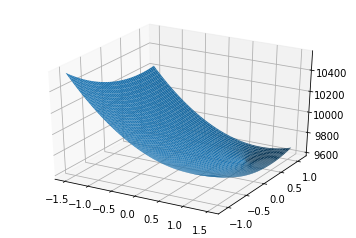

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()